### 1. Libraries

In [60]:
#!pip install -U scikit-learn
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

import seaborn as sns # data visualization library  

### 2. Reading Dataset and Validation

In [2]:
df = pd.read_csv("data/wisconsin.csv", )
df.shape

(569, 32)

In [3]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### 3. Data Analysis (EDA : Exploratory Data Analysis)

In [4]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
df.isnull().sum().sum()

0

In [8]:
df["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

#####  id can be dropped or it can be converted as the index of the row

In [9]:
df = df.drop(columns=["id"])

### 4. Feature Engineering
Feature engineering is the process of selecting, manipulating, and transforming raw data into features that can be used in supervised learning. 
* DataSet / Feature Split 
* Feature Selection / Extraction
* Scaling : 
    * Normalization, or 
    * Standardization
    <details open>
    <summary>
        Normalization v/s Standardization
    </summary>
    <br>
        ![Alt text](./static/images/standard.svg)
        * z = (x - u) / s
        Standardize features by removing the mean and scaling to unit variance.
    https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/
    </details>
* PCA : Principal component analysis

In [10]:
label = "diagnosis"

#### 4.A Normalization
![foRMULA FOR MIN MAX](./static/images/minmax.png "Text to show on mouseover")

* all features will be transformed into the range [0,1] meaning that the minimum and maximum value of a feature/variable is going to be 0 and 1, respectively.
* Why to normalize prior to model fitting?
* Variables that are measured at different scales do not contribute equally to the model fitting & model learned function  and might end up creating a bias. Thus, to deal with this potential problem feature-wise normalization such as MinMax Scaling is usually used prior to model fitting.
* Note: Tree-based models are usually not dependent on scaling, but non-tree models models such as SVM, LDA etc. are often hugely dependent on it.
* One important thing to keep in mind when using the MinMax Scaling is that it is highly influenced by the maximum and minimum values in our data so if our data contains outliers it is going to be biased.
* When the data is not normal distribution!
* norm : removing the magnitute, just the direction is left

<span style="color:red">Were there any outliers in our data ?</span>.

In [11]:
def min_max_scale(column):
    if column.name == label:
        return column
    else:
        old_values = column.values.reshape(-1, 1)
        new_values = MinMaxScaler().fit_transform(old_values)
        new_values = new_values.reshape(-1)
        return new_values


In [12]:
df = df.apply(min_max_scale)

df.shape

(569, 31)

In [13]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,M,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,M,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,M,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,M,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,M,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,M,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,M,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


#### A.B.1 Feature selection with correlation

In [14]:
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
df = df.drop(drop_list1,axis = 1 )        # do not modify x, we will use it later 
df.head()

,diagnosis,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,M,0.022658,0.363733,0.593753,0.703140,0.686364,0.605518,0.120469,0.273811,0.159296,0.135682,0.311645,0.183042,0.601136,0.568610,0.598462,0.418864
1,M,0.272574,0.501591,0.289880,0.203608,0.379798,0.141323,0.082589,0.125660,0.119387,0.046970,0.084539,0.091110,0.347553,0.192971,0.233590,0.222878
2,M,0.390260,0.449417,0.514309,0.462512,0.509596,0.211247,0.094303,0.162922,0.150831,0.096768,0.205690,0.127006,0.483590,0.359744,0.403706,0.213433
3,M,0.360839,0.102906,0.811321,0.565604,0.776263,1.000000,0.175875,0.038155,0.251453,0.142955,0.728148,0.287205,0.915472,0.548642,1.000000,0.773711
4,M,0.156578,0.489290,0.430351,0.463918,0.378283,0.186816,0.093065,0.163688,0.332359,0.143636,0.136179,0.145800,0.437364,0.319489,0.157500,0.142595


#### Dataset split

In [15]:
df_train, df_test = train_test_split(df, test_size=0.3, stratify=df[label], random_state=42)

In [16]:
df_train.shape

(398, 17)

In [17]:
df_test.shape

(171, 17)

### 5. Features-Label split

In [18]:
X_train = df_train.loc[:, df_train.columns != label]
y_train = df_train.loc[:, df_train.columns == label]

X_test = df_test.loc[:, df_test.columns != label]
y_test = df_test.loc[:, df_test.columns == label]
# https://www.analyticsvidhya.com/blog/2020/02/loc-iloc-pandas/
# loc is label-based, which means that we have to specify the name of the rows and columns that we need to filter out.
X_train.shape

(398, 16)

In [19]:
X_train.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
78,0.482246,0.467232,0.685836,0.879569,0.932323,0.662595,0.336987,0.204704,0.294626,0.275505,1.000000,0.175926,0.612362,0.613498,0.763848,0.292536
330,0.196145,0.275589,0.381692,0.282099,0.364646,0.206403,0.085617,0.049436,0.140259,0.093813,0.095514,0.076911,0.477646,0.395847,0.286615,0.237439
378,0.183970,0.185408,0.271283,0.099555,0.369697,0.189764,0.040112,0.008495,0.118945,0.061692,0.144903,0.137266,0.371987,0.205192,0.359156,0.271153
213,0.536016,0.341251,0.433059,0.394096,0.125253,0.183235,0.288808,0.096616,1.000000,0.363131,0.195137,0.403010,0.350855,0.223882,0.007491,0.086187
89,0.187014,0.215652,0.546809,0.233505,0.533333,0.284330,0.083319,0.067161,0.129007,0.112020,0.230596,0.136333,0.373308,0.207987,0.312636,0.194740


#### A.B.2 Univariate feature selection

In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(X_train, y_train)
print('Score list:', select_feature.scores_)
print('Feature list:', X_train)
select_feature.get_feature_names_out(X_train.columns)

Score list: [3.84538882e+00 2.03657696e+01 2.53775484e+00 3.06196825e+01
 1.97970437e+00 3.66545637e-03 1.73972635e-02 1.35240345e+01
 5.85621267e-02 1.31403514e+00 7.91760460e-05 4.95843510e-02
 4.63671197e+00 2.01574199e+01 4.17854903e+00 2.62786200e+00]
Feature list:      texture_mean  area_mean  smoothness_mean  concavity_mean  symmetry_mean  \
78       0.482246   0.467232         0.685836        0.879569       0.932323   
330      0.196145   0.275589         0.381692        0.282099       0.364646   
378      0.183970   0.185408         0.271283        0.099555       0.369697   
213      0.536016   0.341251         0.433059        0.394096       0.125253   
89       0.187014   0.215652         0.546809        0.233505       0.533333   
..            ...        ...              ...             ...            ...   
37       0.294555   0.161315         0.335831        0.060028       0.205556   
415      0.387555   0.123139         0.407150        0.059864       0.484343   
458      

array(['area_mean', 'concavity_mean', 'area_se', 'smoothness_worst',
       'concavity_worst'], dtype=object)

In [21]:
X_train = select_feature.transform(X_train)
X_test = select_feature.transform(X_test)
#pd.DataFrame(X_train)
#.cv_results_).sort_values("rank_test_score")
#print('Feature list:', X_train.columns)

#### A.B.3 Feature Extraction with PCA

In [22]:
#from sklearn.decomposition import PCA
#pca = PCA()
#pca.fit(X_train)

### 6. Vectorization

### 7. Modelling

#### 1. SVC

##### Object

In [23]:
svc_obj = SVC()

##### Params

In [24]:
svc_params = {
    'kernel':('linear', 'rbf', 'sigmoid'),
    'C':[i for i in range(1, 11)]
}

##### Create a grid search object and train it on all combinations

In [25]:
svc_gs_clf = GridSearchCV(svc_obj, svc_params)

svc_gs_clf.fit(X_train, y_train.values.reshape(-1))

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'kernel': ('linear', 'rbf', 'sigmoid')})

##### Get best parameters as per grid search

In [26]:
svc_gs_clf.best_estimator_

SVC(C=8, kernel='linear')

##### Get the CV score on best parameters

In [27]:
svc_gs_clf.best_score_

0.9446518987341772

##### Display all grid search results

In [53]:
pd.DataFrame(svc_gs_clf.cv_results_).sort_values("rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
21,0.001998,0.000631,0.000599,0.000489,8,linear,"{'C': 8, 'kernel': 'linear'}",0.9625,0.9750,0.9250,0.936709,0.924051,0.944652,0.020559,1
18,0.001999,0.002448,0.000000,0.000000,7,linear,"{'C': 7, 'kernel': 'linear'}",0.9625,0.9625,0.9250,0.936709,0.924051,0.942152,0.017202,2
15,0.002925,0.001963,0.000232,0.000399,6,linear,"{'C': 6, 'kernel': 'linear'}",0.9625,0.9625,0.9250,0.949367,0.911392,0.942152,0.020594,2
28,0.004439,0.002374,0.000404,0.000808,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.9625,0.9875,0.9125,0.911392,0.936709,0.942120,0.029413,4
27,0.003000,0.002449,0.000000,0.000000,10,linear,"{'C': 10, 'kernel': 'linear'}",0.9625,0.9750,0.9250,0.924051,0.924051,0.942120,0.022102,4
24,0.002191,0.000393,0.001003,0.000002,9,linear,"{'C': 9, 'kernel': 'linear'}",0.9625,0.9750,0.9250,0.924051,0.924051,0.942120,0.022102,4
6,0.003000,0.002449,0.001000,0.002000,3,linear,"{'C': 3, 'kernel': 'linear'}",0.9625,0.9625,0.9250,0.936709,0.911392,0.939620,0.020327,7
12,0.003000,0.002450,0.001000,0.002000,5,linear,"{'C': 5, 'kernel': 'linear'}",0.9625,0.9625,0.9250,0.936709,0.911392,0.939620,0.020327,7
9,0.002004,0.002454,0.001000,0.002000,4,linear,"{'C': 4, 'kernel': 'linear'}",0.9625,0.9625,0.9250,0.936709,0.911392,0.939620,0.020327,7
1,0.007516,0.004042,0.004397,0.002331,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.9625,0.9625,0.9250,0.911392,0.936709,0.939620,0.020327,10


##### Calculate test scores on best parameters

In [29]:
svc_gs_clf.score(X_test, y_test.values.reshape(-1))

0.9532163742690059

<AxesSubplot:>

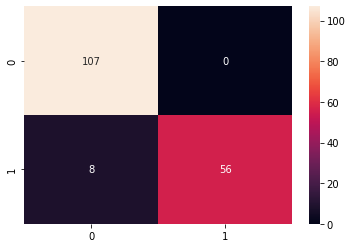

In [47]:
cm_2 = confusion_matrix(y_test,svc_gs_clf.predict(X_test))
sns.heatmap(cm_2,annot=True,fmt="d")

#### 2. Decision Tree

In [30]:
dt_obj = DecisionTreeClassifier()

In [31]:
dt_params = {
    "max_depth": [i for i in range(3, 11)],
    "min_samples_split": [i for i in range(2, 5)],
    "min_samples_leaf": [i for i in range(1, 5)]
}

In [32]:
dt_gs_clf = GridSearchCV(dt_obj, dt_params)

dt_gs_clf.fit(X_train, y_train.values.reshape(-1))

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4]})

In [33]:
dt_gs_clf.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_split=4)

In [34]:
dt_gs_clf.best_score_

0.959746835443038

In [35]:
#pd.DataFrame(dt_gs_clf.cv_results_).sort_values("rank_test_score")

In [36]:
dt_gs_clf.score(X_test, y_test.values.reshape(-1))

0.9122807017543859

<AxesSubplot:>

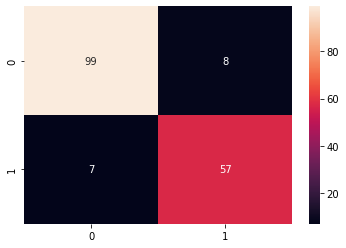

In [48]:
cm_2 = confusion_matrix(y_test,dt_gs_clf.predict(X_test))
sns.heatmap(cm_2,annot=True,fmt="d")

#### 3. Gaussian NB

In [37]:
gnb_clf =  GaussianNB()

gnb_clf.fit(X_train, y_train.values.reshape(-1))

gnb_clf.score(X_test, y_test.values.reshape(-1))

0.935672514619883

<AxesSubplot:>

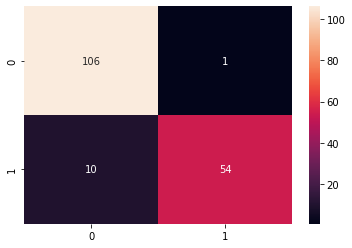

In [49]:
cm_2 = confusion_matrix(y_test,gnb_clf.predict(X_test))
sns.heatmap(cm_2,annot=True,fmt="d")

 #### 4. RandomForest 

In [38]:
#rf_clf = RandomForestClassifier(random_state=43 , )      

#rf_clf.fit(X_train,y_train.values.reshape(-1))

#rf_clf.score(X_test, y_test.values.reshape(-1))

In [39]:
rf_obj = RandomForestClassifier()
rf_params = {
    'criterion':('gini', 'entropy'),
    'n_estimators':[i for i in range(100, 105)],
    'max_features' : ( 'auto', 'sqrt', 'log2')
}

In [40]:
rf_gs_clf = GridSearchCV(rf_obj, rf_params)

rf_gs_clf.fit(X_train, y_train.values.reshape(-1))

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': [100, 101, 102, 103, 104]})

In [41]:
svc_gs_clf.score(X_test, y_test.values.reshape(-1))

0.9532163742690059

Accuracy is:  0.9532163742690059


<AxesSubplot:>

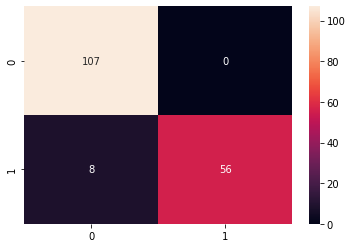

In [59]:
ac = accuracy_score(y_test,svc_gs_clf.predict(X_test))
print('Accuracy is: ',ac)
cm_2 = confusion_matrix(y_test,svc_gs_clf.predict(X_test))
sns.heatmap(cm_2,annot=True,fmt="d")

In [62]:
precision_recall_fscore_support(y_test,svc_gs_clf.predict(X_test),average='macro')

(0.9652173913043478, 0.9375, 0.9486486486486486, None)